# Stochastic Model: Results of different #agent values

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
results = pd.read_csv('./agents_results.csv')
results = results.drop_duplicates(subset='damage')
results = results.loc[(results['num_robots'] == 3) & (results['f'] == 2) & (results['sigma'] == 1)]
results = results.groupby(['planner', 'num_agents'], as_index=False).mean()
results.head()

,planner,num_agents,num_robots,f,d,sigma,active_time,planner_time,damage,num_disabled
0,StochasticIterativePlanner,50,3.0,2.0,1.0,1.0,198.926931,0.098092,11379.404981,4.530333
1,StochasticIterativePlanner,100,3.0,2.0,1.0,1.0,212.944792,0.366666,23342.868214,8.247667
2,StochasticIterativePlanner,200,3.0,2.0,1.0,1.0,228.621633,1.352366,47586.081842,12.881000
3,StochasticIterativePlanner,300,3.0,2.0,1.0,1.0,243.934783,2.645207,71671.567911,17.083000
4,StochasticIterativePlanner,400,3.0,2.0,1.0,1.0,249.989933,4.086660,96045.573329,19.163667


In [120]:
planners_names = ['StochasticStaticLackPlanner', 'StochasticAdditive5LackPlanner', 'StochasticIterativePlanner']

colors = ['tab:red', 'tab:brown', 'tab:blue', 'tab:green', 'navajowhite', 'burlywood', 'tab:orange']

planners_results = [results.loc[results['planner'] == name] for name in planners_names]

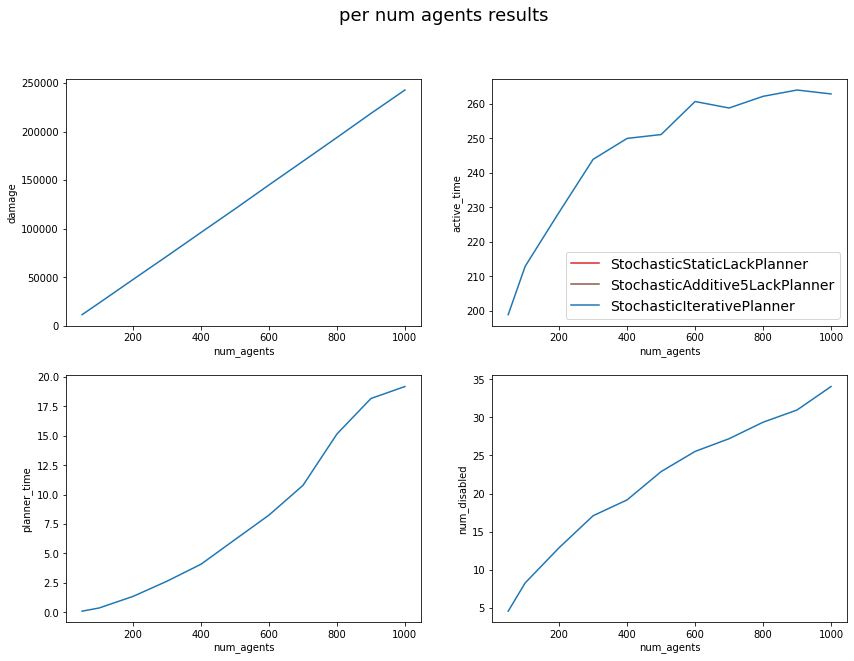

In [121]:
Y = ['damage', 'active_time', 'planner_time', 'num_disabled']
X = ['num_agents' for y in Y]

plt.figure(figsize=(14,10))
plt.suptitle('per num agents results', fontsize=18)

for i in range(len(Y)):
    x = X[i]
    y = Y[i]

    plt.subplot(2, 2, i+1)
    plt.xlabel(x)
    plt.ylabel(y)
    for j in range(len(planners_results)):
        r = planners_results[j]
        plt.plot(list(r[x]), list(r[y]), c=colors[j])

    if i==1:
        plt.legend(planners_names, fontsize='14')

plt.savefig('./plots/stochastic_num_agents.png')
plt.show()